### cos類似度の計算

In [1]:
### リスト1 ###

# cos類似度 (cosine similarity) の計算 

from collections import Counter
import math

def cosine_similarity(query, document):
    # クエリとドキュメントをCounterに変換して、操作を容易にする
    query_counter = Counter(query)
    document_counter = Counter(document)
    
    # 内積を計算する
    dot_product = sum(query_counter[word] * document_counter.get(word, 0) for word in query_counter)
    
    # 両ベクトルの距離（ノルム）を計算する
    query_norm = math.sqrt(sum(value ** 2 for value in query_counter.values()))
    document_norm = math.sqrt(sum(value ** 2 for value in document_counter.values()))
    
    # cos類似度を計算する
    if query_norm == 0 or document_norm == 0:
        # ゼロで除算することを避ける
        return 0
    else:
        return dot_product / (query_norm * document_norm)

# クエリベクトルと文書ベクトルを定義する---(1)
query_vector = {'大阪': 1, '観光': 1}
document_vector = {'大阪':0, '京都':3, '奈良':1, '交通':2, '観光':1, '経済':0, '宿泊':1, '歴史':1, '公園':1, 'みやげ':1}

# cos類似度を計算する ---(1)
cos_sim = cosine_similarity(query_vector, document_vector)
print("(1) Cosine similarity:", cos_sim)


# 文書ベクトルの単語の頻度を変化させる---(2)
# document_vector において、'大阪':0 => 4,
query_vector = {'大阪': 1, '観光': 1}
document_vector = {'大阪':4, '京都':3, '奈良':1, '交通':2, '観光':1, '経済':0, '宿泊':1, '歴史':1, '公園':1, 'みやげ':1}

# cos類似度を計算する ---(2)
cos_sim = cosine_similarity(query_vector, document_vector)
print("(2) Cosine similarity:", cos_sim)


# 文書ベクトルの単語の頻度を変化させる---(3)
# document_vector において、'奈良':1 => 3, '京都':3 => 5,
query_vector = {'大阪': 1, '観光': 1}
document_vector = {'大阪':4, '京都':5, '奈良':3, '交通':2, '観光':1, '経済':0, '宿泊':1, '歴史':1, '公園':1, 'みやげ':1}

# cos類似度を計算する ---(3)
cos_sim = cosine_similarity(query_vector, document_vector)
print("(3) Cosine similarity:", cos_sim)

(1) Cosine similarity: 0.16222142113076252
(2) Cosine similarity: 0.5976143046671968
(3) Cosine similarity: 0.4602873089491617


### 教師なし学習 ($k$-means クラスタリング)

C:\Users\zakug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zakug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


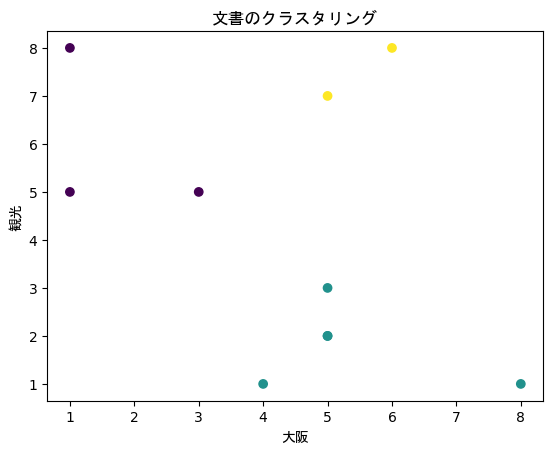

In [18]:
### リスト2 ###

# k-means クラスタリング #

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 日本語化対応
# 初めに次の pip install を行なう必要がある。
# pip install japanize-matplotlib
from matplotlib.font_manager import FontProperties

# 文書データ[大阪, 観光]（各単語の頻度を仮定）
X = [[5, 3], [1, 5], [5, 2], [4, 1], [3, 5], [5, 7], [1, 8], [6, 8], [5, 2], [8, 1]]


# クラスタリングモデルの構築
kmeans = KMeans(n_clusters=3) # クラスタ数を設定
kmeans.fit(X)

# クラスタリング結果の可視化
plt.scatter(*zip(*X), c=kmeans.labels_, cmap='viridis')
plt.xlabel('大阪', fontname ='MS Gothic')
plt.ylabel('観光', fontname ='MS Gothic')

plt.title('文書のクラスタリング', fontname ='MS Gothic')
plt.show()

In [15]:
### リスト3 ###

### Logistic Regression （対数回帰モデル）を用いた分類 ###

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 文書データ[大阪, 京都, 観光]（各単語の頻度を仮定）
X = [[4, 0, 2], [0, 3, 4], [0, 5, 3], [1, 4, 2], [5, 1, 3], [2, 3, 5], [2, 1, 0], [1, 3, 0], [1, 0, 3], [2, 7, 0]]

# クラスのラベル => 大阪の観光: 0, 京都の観光: 1, そうでないもの: 2
y = [0, 1, 1, 1, 0, 1, 2, 2, 0, 2]


# データの分割
# test_size を変えると、Accyracy の値が変動する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# モデルの構築と学習
model = LogisticRegression()
model.fit(X_train, y_train)

# モデルの評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5
